<a href="https://colab.research.google.com/github/lakshayus/Linear-Regression-Implementation-Car-Dekho-Dataset/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Car dekho project/self project/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
dataset.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
# duplicate
len(dataset[dataset.duplicated()])
dataset.drop_duplicates(keep='first', inplace=True)

In [ ]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

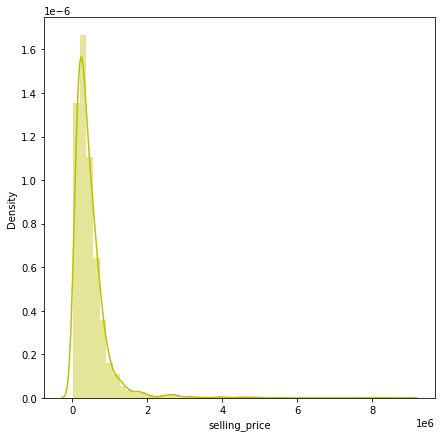

In [ ]:
# Dependent variable 'Selling Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['selling_price'],color="y")

From se above graph we can see as our price in  10^6 so it our graph is movig towards to y axis and we couldn't get any better visualziation with these type of graph.
<br>So,It better to take log of the dependent variable to draw the graph.

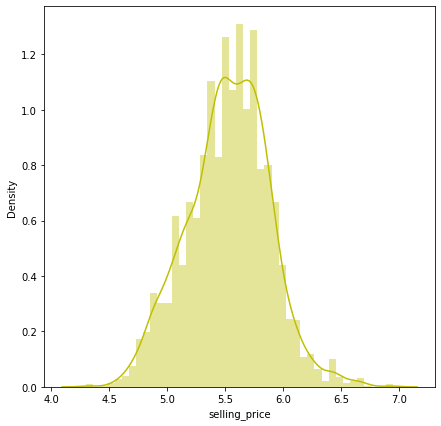

In [ ]:
# Dependent variable 'Selling Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['selling_price']),color="y")

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

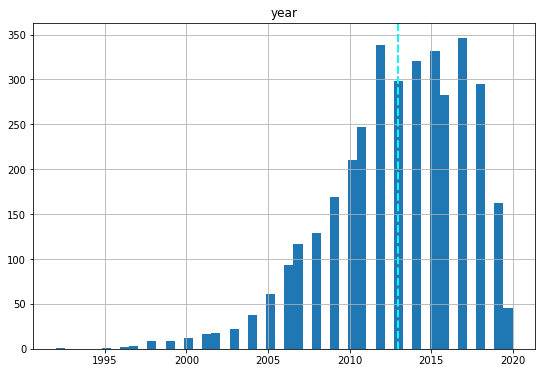

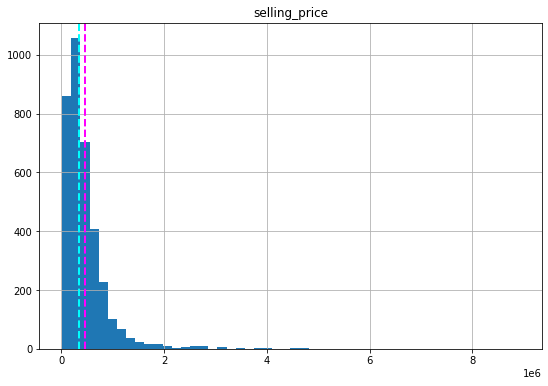

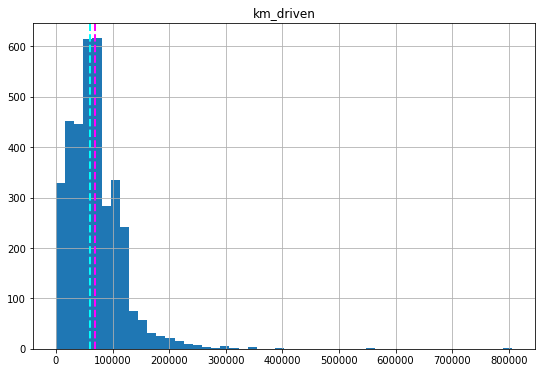

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

From above it's clear that our numeric data is right as well as left skewed for some columns..
<br> Let's try to make it noraml distribution..by tranforming the data into some other form..and then visualize the thing..

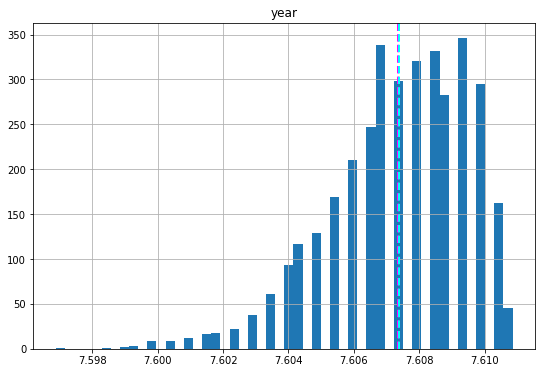

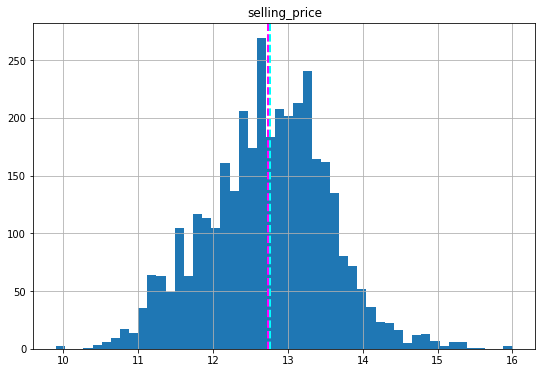

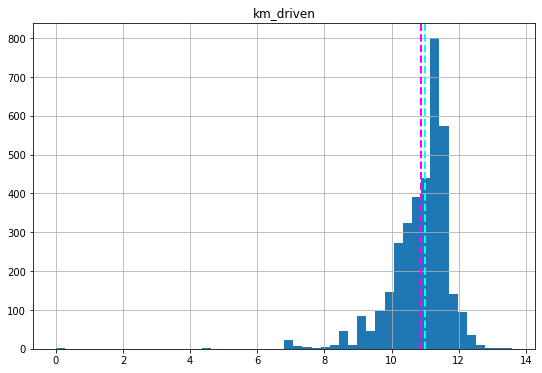

In [ ]:
#applying log transformation
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Now, we can visualize what the relationship between them...
<br>**Let's try to plot some scatter** plot between independent with the dependent variable and figure out how they behaves or what they have relationship....

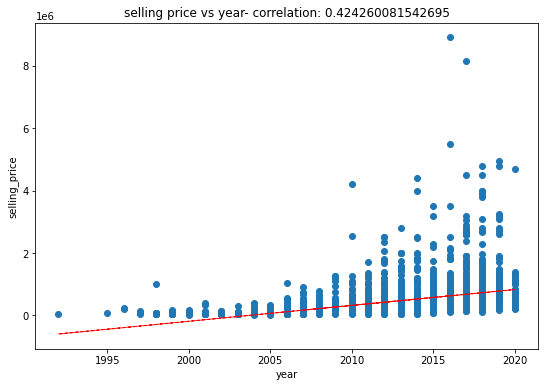

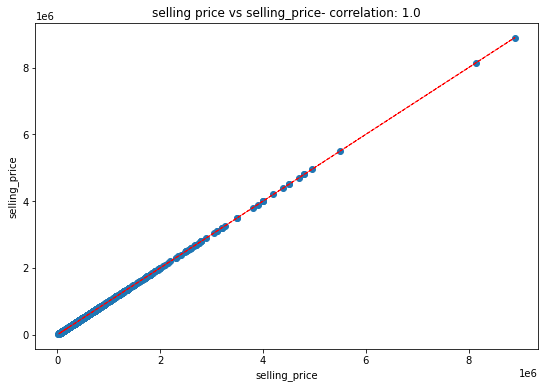

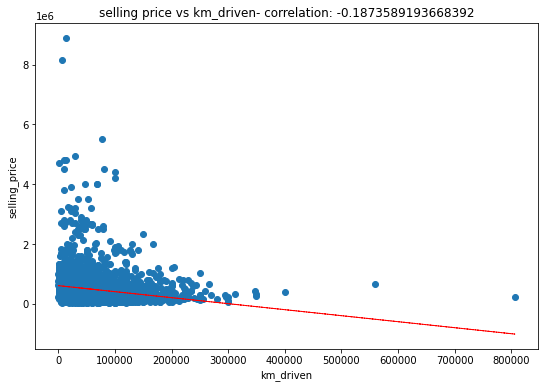

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From above we can see most of the car have driven less the 200000 km and we take that one as boundry condition and make them as an outlier.
<br> And for the Year column we can keep the data for last 15 year from which we can make a good model.

### **Let's try to remove outlier(Unwanted or Extra which makes our dataset quiet unwell) from our dataset.**

---
Let's keep the data only for last 15 year that is between 2005 to 2020. and KM_driven is less then 200000.

In [ ]:
dataset=dataset[dataset['year'] >= 2005]

In [ ]:
dataset=dataset[dataset['km_driven'] <= 200000]

In [ ]:
dataset.reset_index(inplace=True)

In [ ]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Let's Draw one more time scatter plot between dependent and all the indendent variable...

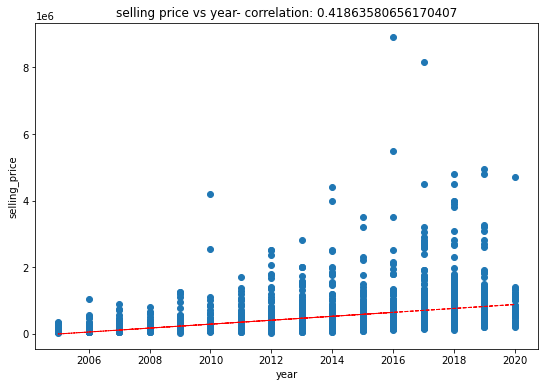

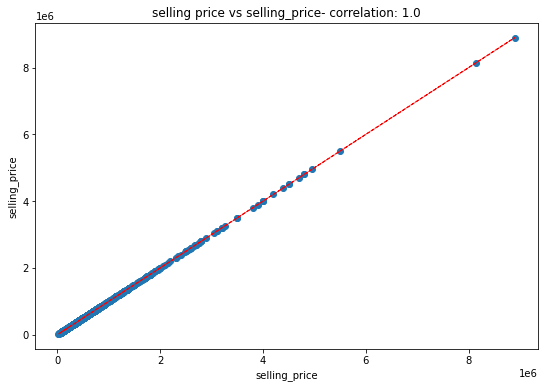

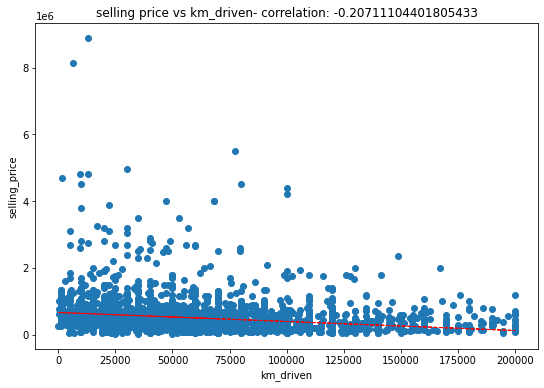

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

After removing outlier we are getting our scatter plot in a quiet well manner now we can find out the relation between them..
<br>Here we cay say that..
* If the KM_driven is less then price will be high for the car.
* If the car is too old then it will be relativily cheap then latest one.

Let's try to  find and remove the multicollinearity from our dataset and also find some correlation between numerical data.
<br> we can also use some feature engineering to create someother variable with existing one to get more understanding the data.

In [ ]:
# calculating car age
dataset['Car Age']= 2020 - dataset['year']

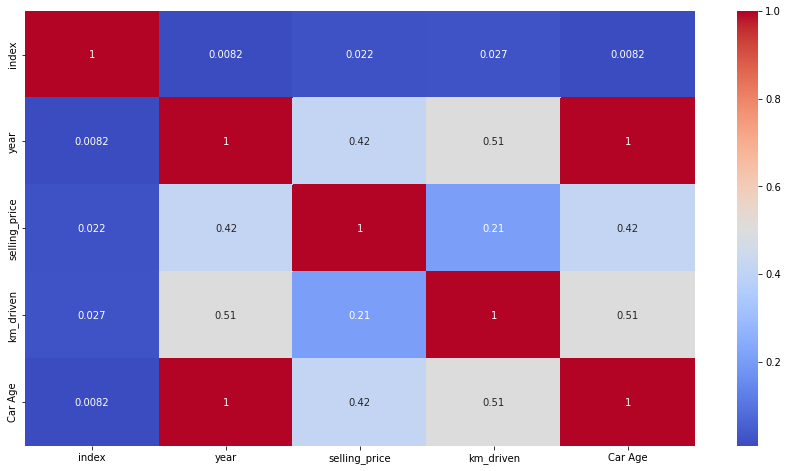

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['year','selling_price']]])

,variables,VIF
0,index,2.432067
1,km_driven,4.625989
2,Car Age,4.702584


We are getting VIF is 4.065 that is good to perform our linear regression.

In [ ]:
numerical_features = ['km_driven','Car Age']

In [ ]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [ ]:
dataset['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
dataset['company'] = dataset['name'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche','Bmw' : 'BMW','Mg' : 'MG'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Mitsubishi         5
Land               5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age,company
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda


# Analysis of Categorical Data

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns

In [ ]:
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

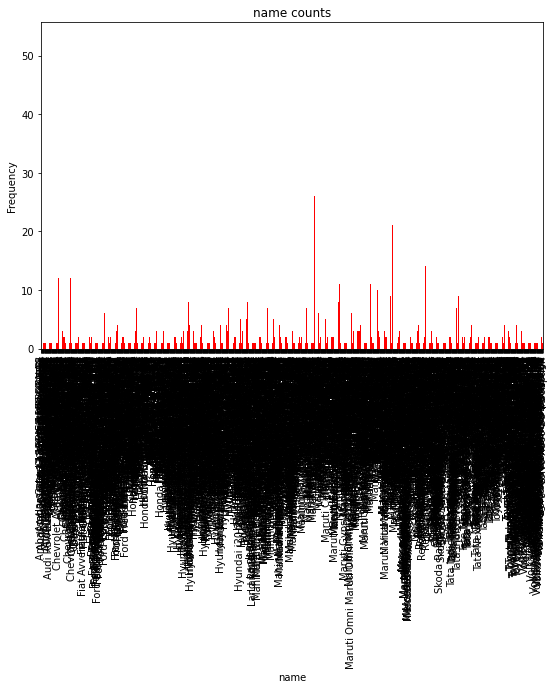

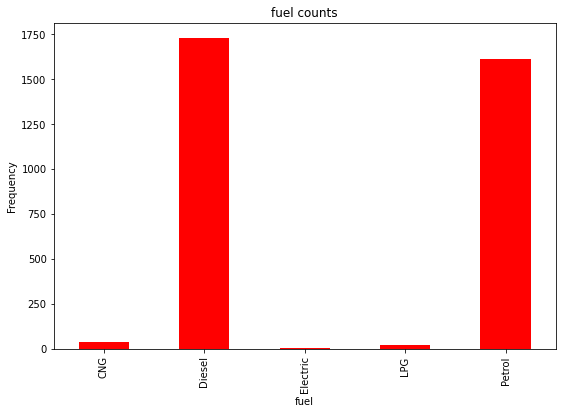

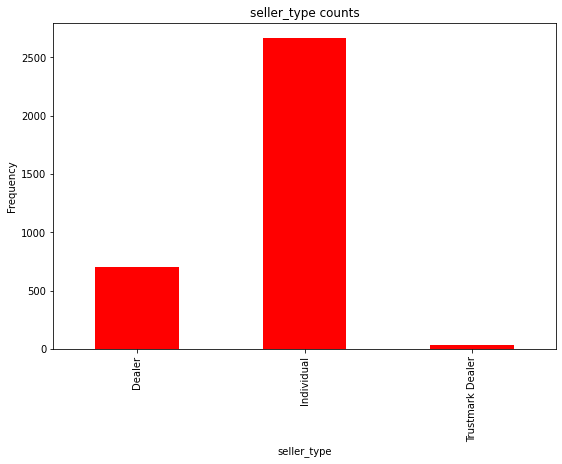

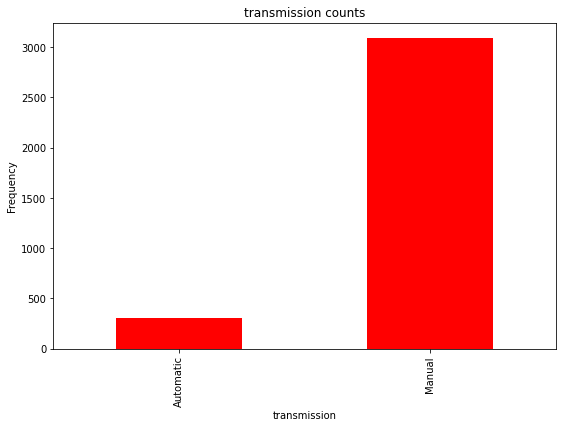

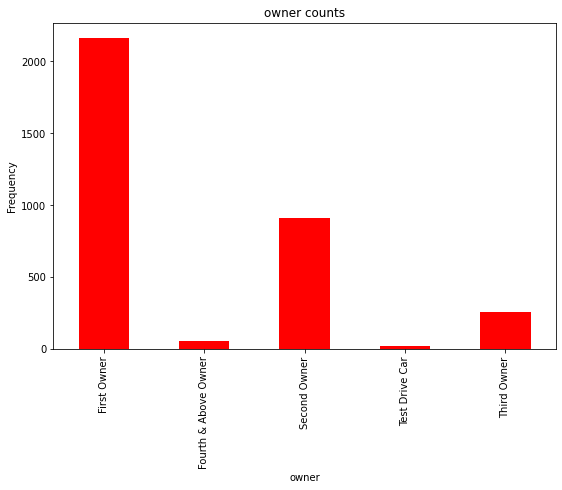

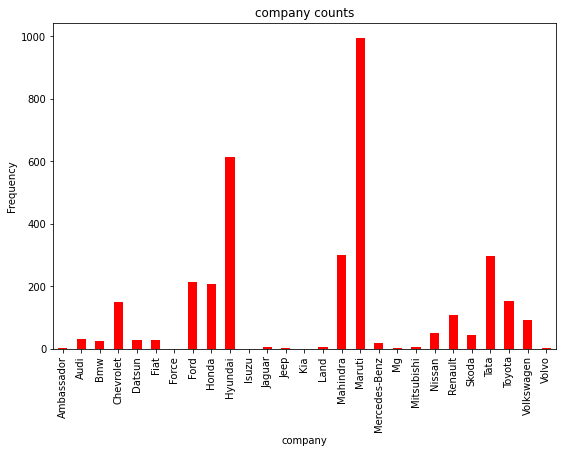

In [ ]:
# plot a bar plot for each categorical feature count
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

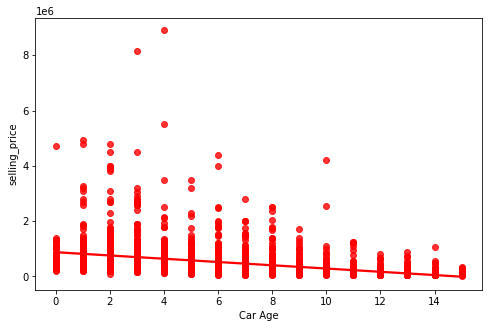

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x='Car Age',y='selling_price',data=dataset,color='red')

as car age increases selling price decreases

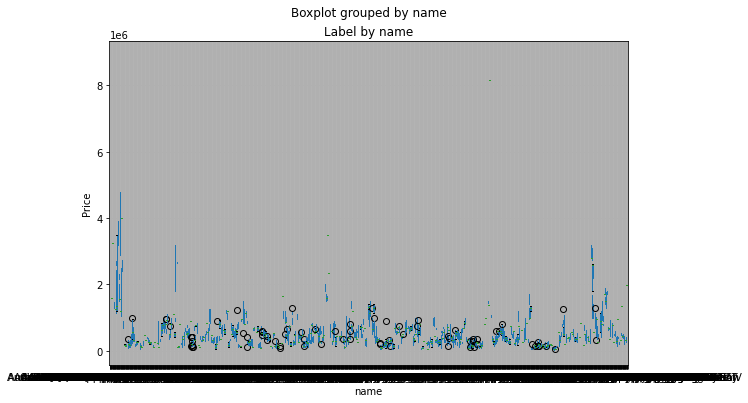

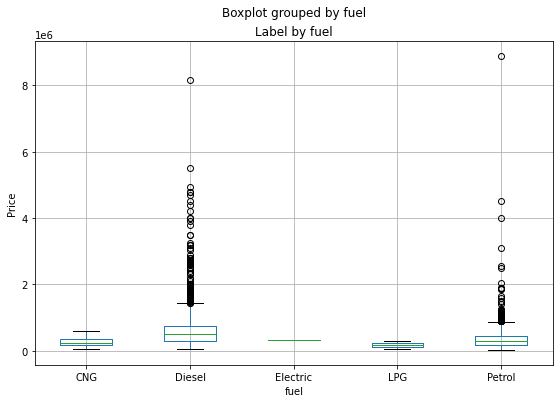

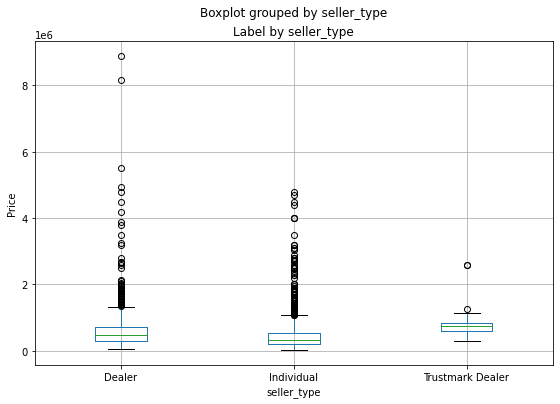

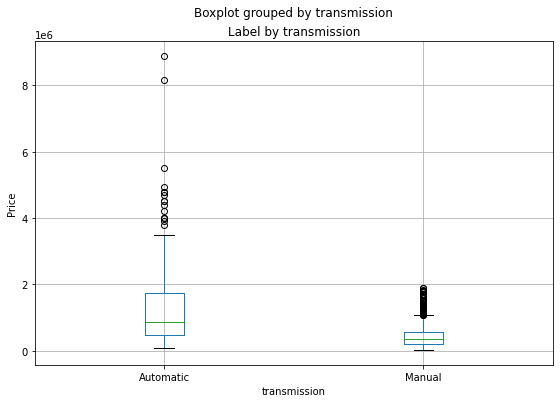

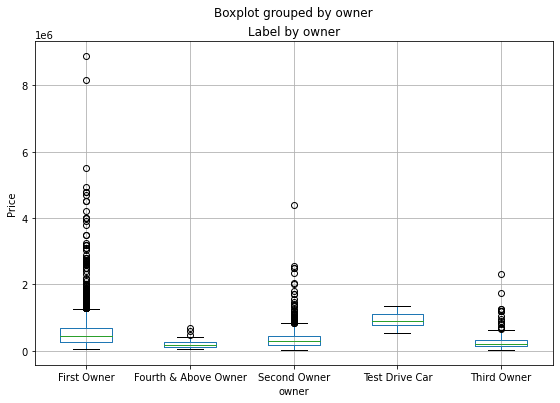

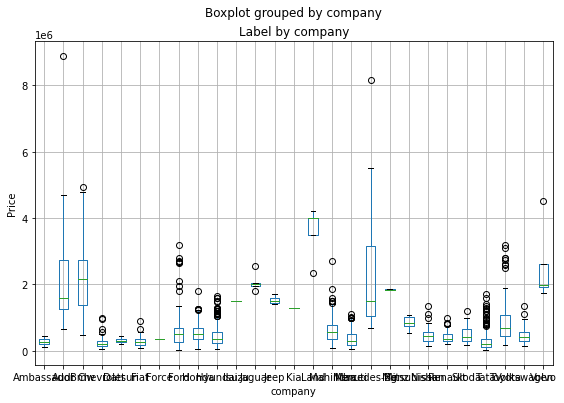

In [ ]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

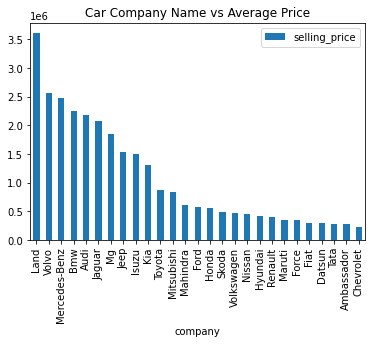

In [ ]:
# Average selling price for each company
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
df_autox.rename(columns={'selling_price':'Average_Selling_Price'},inplace=True)

In [ ]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [ ]:
dataset['Company_Category'] = dataset['Average_Selling_Price'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [ ]:
dataset["Company_Category"].value_counts()

1    1636
0    1504
2     255
Name: Company_Category, dtype: int64

In [ ]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age,company,Average_Selling_Price,Company_Category
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557,1
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172,0
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541,1


# Data Preparation

In [ ]:
dataset.shape

(3395, 13)

In [ ]:
dataset_copy =dataset.copy()

In [ ]:
dataset_copy.shape

(3395, 13)

## **Feature Engineering**

---
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.




We shall convert categorical features to numeric type...


In [ ]:
### Data encoding
#label encoding
encoders_nums = {
                 "owner":{"Test Drive Car":4,"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3},
                 }

dataset_copy = dataset_copy.replace(encoders_nums)

In [ ]:
# One hot encoding
dataset_copy = pd.get_dummies(dataset_copy, columns=["fuel"], prefix=["Fuel_Type"])
dataset_copy = pd.get_dummies(dataset_copy, columns=["seller_type",'transmission'],prefix=["Seller_Type","Transmission"])

In [ ]:
dataset_copy.head()

,index,name,year,selling_price,km_driven,owner,Car Age,company,Average_Selling_Price,Company_Category,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,0,Maruti 800 AC,2007,60000,70000,0,13,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,0,13,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,0,8,Hyundai,423908.747557,1,0,1,0,0,0,0,1,0,0,1
3,3,Datsun RediGO T Option,2017,250000,46000,0,3,Datsun,296551.655172,0,0,0,0,0,1,0,1,0,0,1
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,1,6,Honda,557067.584541,1,0,1,0,0,0,0,1,0,0,1


In [ ]:
dataset_copy.drop(['index'], axis = 1, inplace = True)

With the help of one  hot coding

*   Fuel type attribute  is divided into 5 new attributes.
*   Transmission attribute is divided into 2 new attributes.
*   Seller_Type attribute is is divided into 2 new attributes.

In [ ]:
dataset_copy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'Car Age',
       'company', 'Average_Selling_Price', 'Company_Category', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
features = numerical_features.copy()

In [ ]:
features.extend(['owner','Company_Category','Average_Selling_Price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'])

In [ ]:
features

['km_driven',
 'Car Age',
 'owner',
 'Company_Category',
 'Average_Selling_Price',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Seller_Type_Dealer',
 'Seller_Type_Individual',
 'Seller_Type_Trustmark Dealer',
 'Transmission_Automatic',
 'Transmission_Manual']

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_copy[features].apply(zscore)

In [ ]:
y = np.log10(dataset['selling_price'])

# **Implementing Linear Regression**




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(2716, 15)
(679, 15)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train,y_train)

0.7460054511255816

In [ ]:
reg.coef_

array([-1.74923197e-02, -1.87982749e-01, -1.43158144e-02,  5.92765457e-02,
        8.14184583e-02,  2.02503772e+11,  9.75070686e+11,  2.43929682e+10,
        1.52923453e+11,  9.73891685e+11, -9.91315193e+10, -1.00818300e+11,
       -2.40402612e+10, -8.09440232e+10, -8.09440232e+10])

In [ ]:
y_pred = reg.predict(X_test)

## Regression Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 62036179046.59366
RMSE : 249070.63063836662


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7580137264526585
Adjusted R2 :  0.7525389238837141


Text(0, 0.5, 'Predicted selling price')

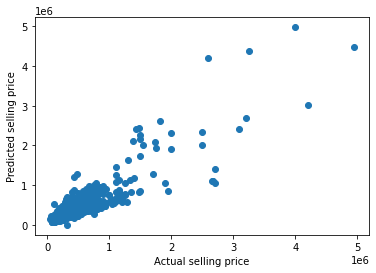

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

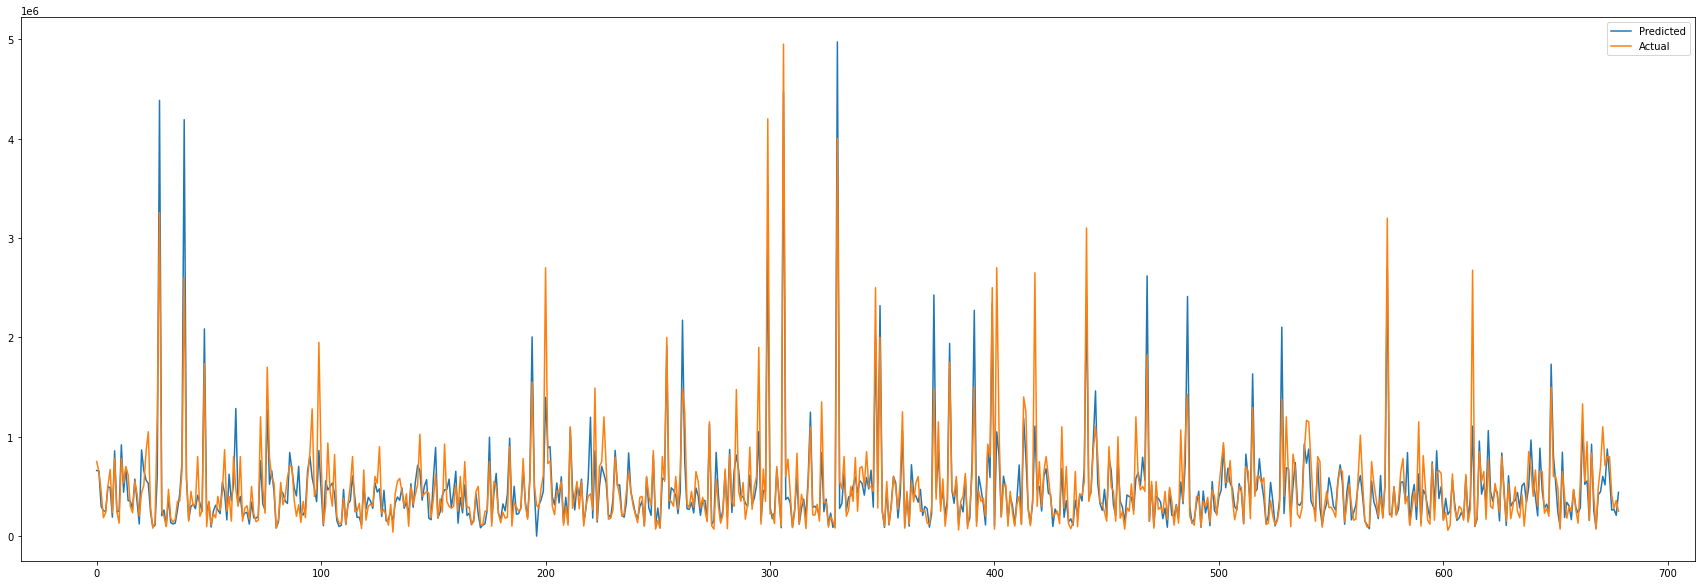

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

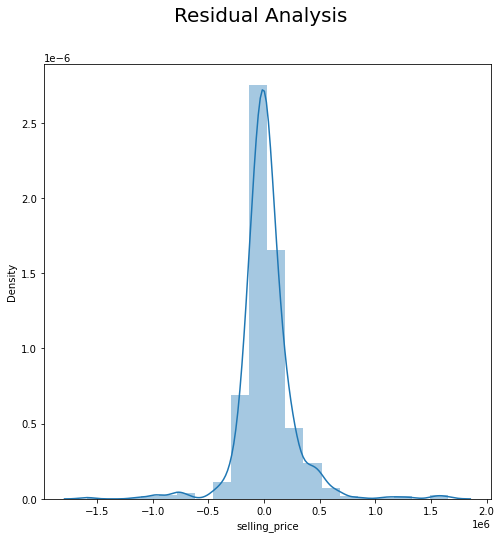

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

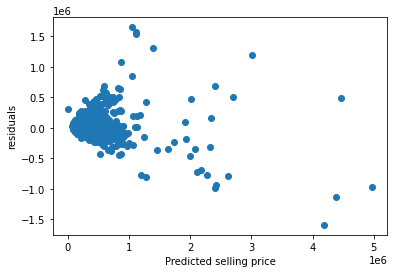

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred),10**(y_test)-10**(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# **Linear regression model from statsmodels.api.**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     851.2
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:54:18   Log-Likelihood:                 1216.2
No. Observations:                3395   AIC:                            -2406.
Df Residuals:                    3382   BIC:                            -2327.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.5522      0.003   1909.251      0.000       5.546       5.558
km_driven                       -0.0155      0.004     -4.059      0.000      -0.023      -0.008
Car Age                         -0.1897      0.004    -51.399      0.000      -0.197      -0.182
owner                           -0.0135      0.003     -4.225      0.000      -0.020      -0.007
Company_Category                 0.0568      0.004     14.286      0.000       0.049       0.065
Average_Selling_Price            0.0797      0.004     18.199      0.000       0.071       0.088
Fuel_Type_CNG                   -0.0094      0.003     -3.283      0.001      -0.015      -0.004
Fuel_Type_Diesel                 0.0447      0.002     26.130      0.000       0.041       0.048
Fuel_Type_Electric              -0.0008      0.003     -0.258      0.797      -0.006       0.005
Fuel_Type_LPG                   -0.0090      0.003     -3.139      0.002      -0.015      -0.003
Fuel_Type_Petrol                -0.0413      0.002    -24.174      0.000      -0.045      -0.038
Seller_Type_Dealer               0.0073      0.002      4.609      0.000       0.004       0.010
Seller_Type_Individual          -0.0104      0.002     -6.804      0.000      -0.013      -0.007
Seller_Type_Trustmark Dealer     0.0135      0.003      4.739      0.000       0.008       0.019
Transmission_Automatic           0.0211      0.002     12.337      0.000       0.018       0.024
Transmission_Manual             -0.0211      0.002    -12.337      0.000      -0.024      -0.018
==============================================================================
Omnibus:                       49.481   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.208
Skew:                          -0.162   Prob(JB):                     2.09e-16
Kurtosis:                       3.637   Cond. No.                     1.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage.

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7447902115055101

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59947897893.12127
MAE : 144033.9490854695
RMSE : 244842.5981995806
R2 : 0.7661595436550428
Adjusted R2 :  0.7608690355929397


Text(0, 0.5, 'Predicted selling price')

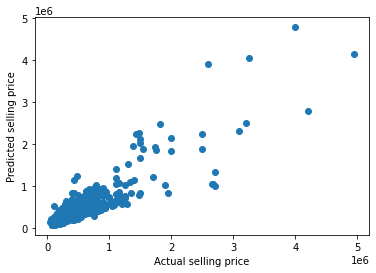

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

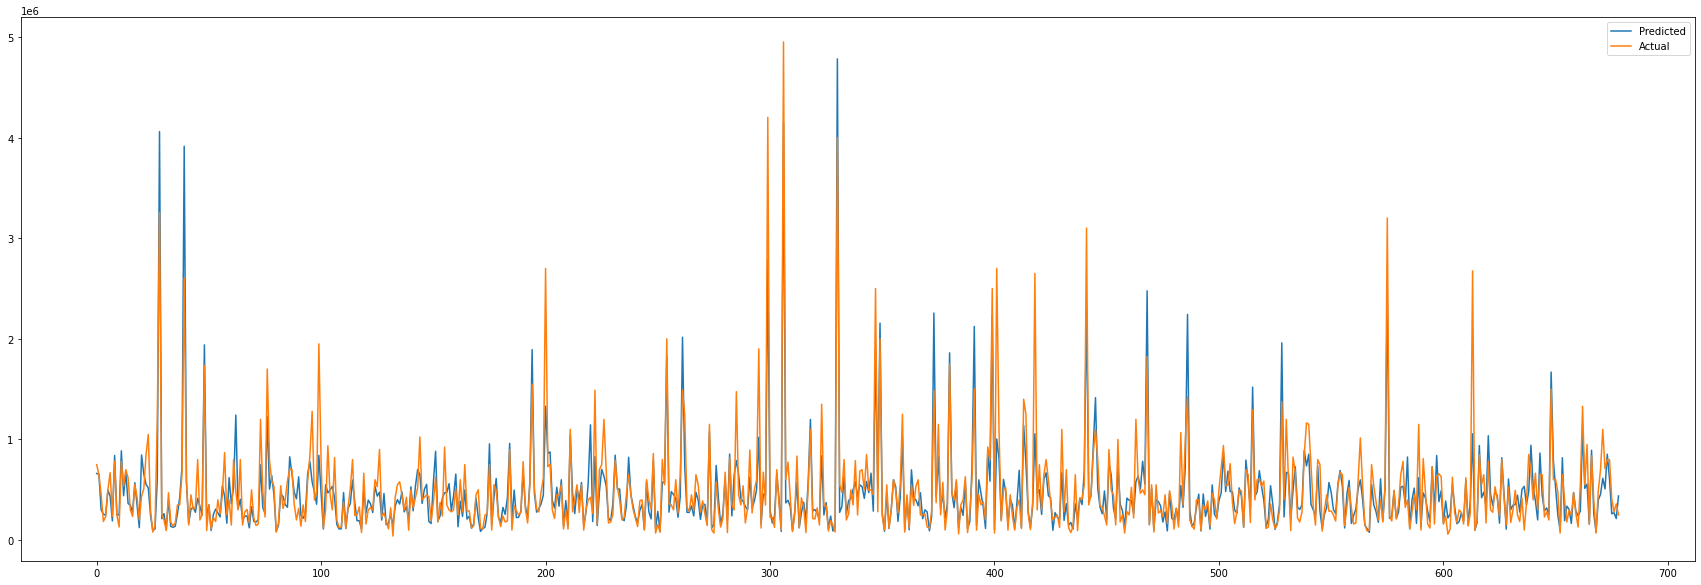

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

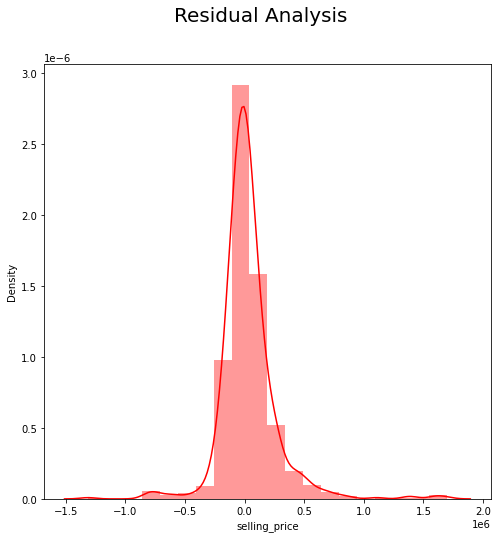

In [ ]:
#Resildual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

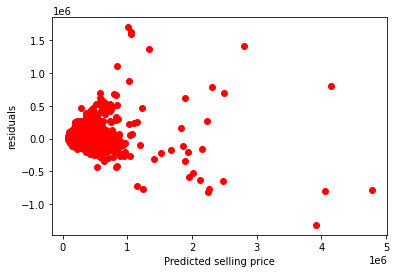

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_l),10**(y_test)-10**(y_pred_l),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Implementing Cross-Validation Procedure for Lasso**

---
Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.029346408730421356


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61365877719.64536
MAE : 145556.6583598306
RMSE : 247721.37114033048
R2 : 0.7606283897468022
Adjusted R2 :  0.755212742456006


Text(0, 0.5, 'Predicted selling price')

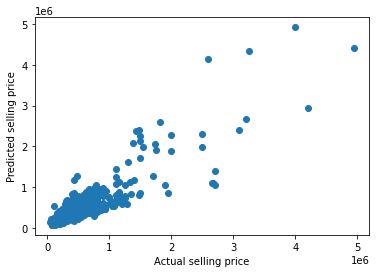

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

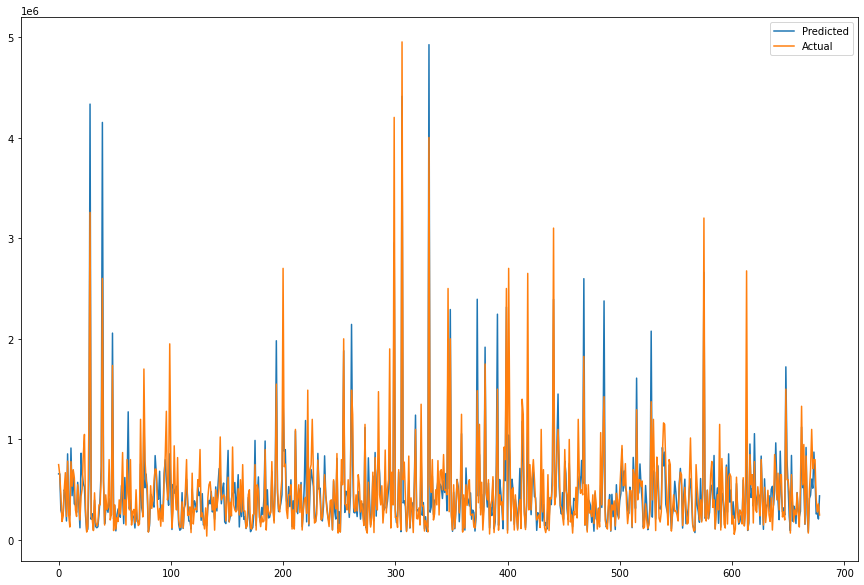

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

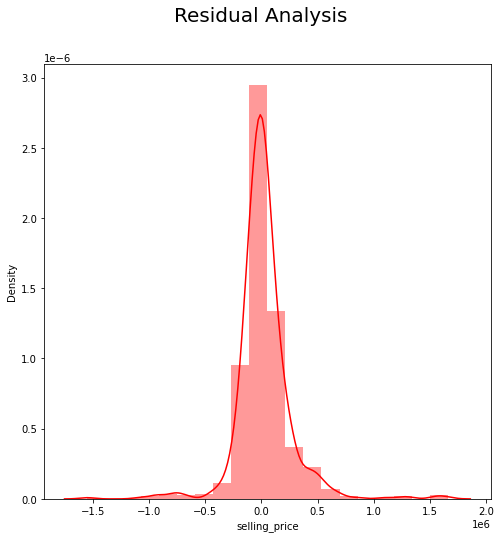

In [ ]:
#Resildual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

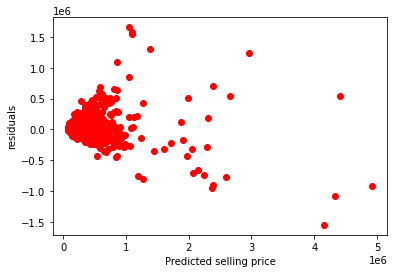

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

**<br>Implementing Ridge Regression**
---

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.7460217015531888

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61982766339.23467
MAE : 145995.40453021642
RMSE : 248963.383531062
R2 : 0.7582220749069398
Adjusted R2 :  0.7527519861039295


Text(0, 0.5, 'Predicted selling price')

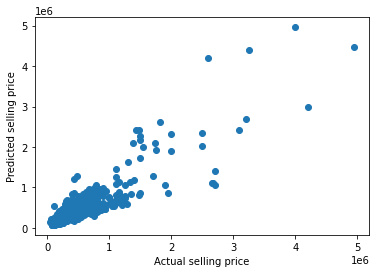

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

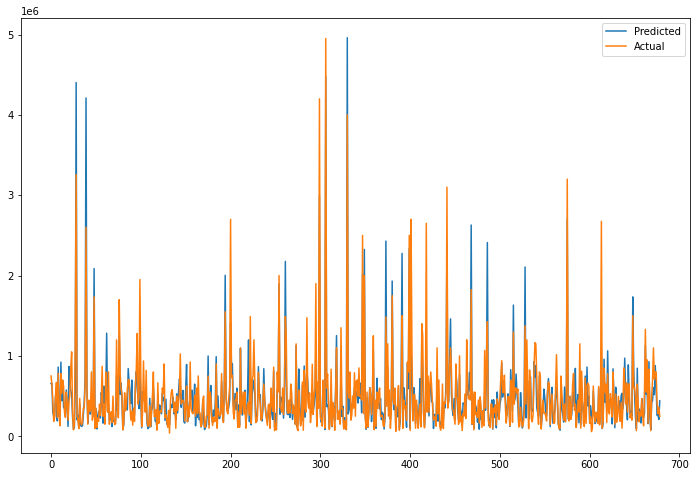

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

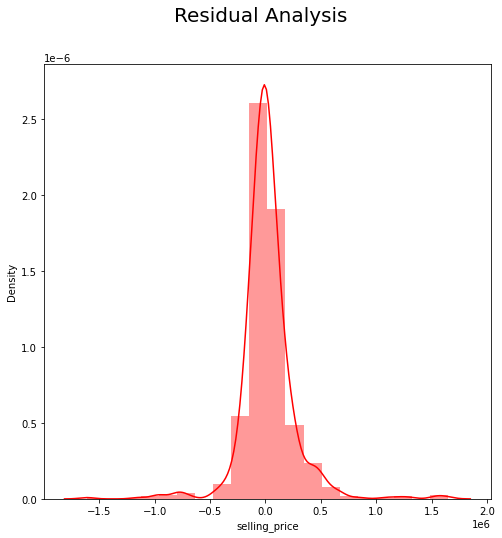

In [ ]:
#Resildual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

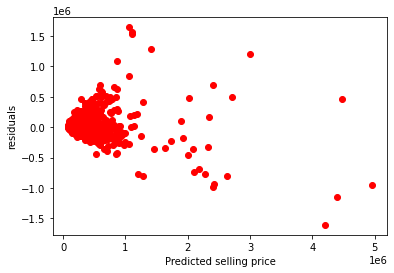

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## Running Grid Search Cross Validation for Ridge Regression

---

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.029408608138141886


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61985423632.18315
RMSE : 248968.72018826613
R2 : 0.7582117095293778
Adjusted R2 :  0.7527413862155627


Text(0, 0.5, 'Predicted selling price')

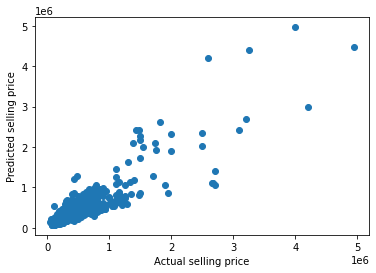

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')


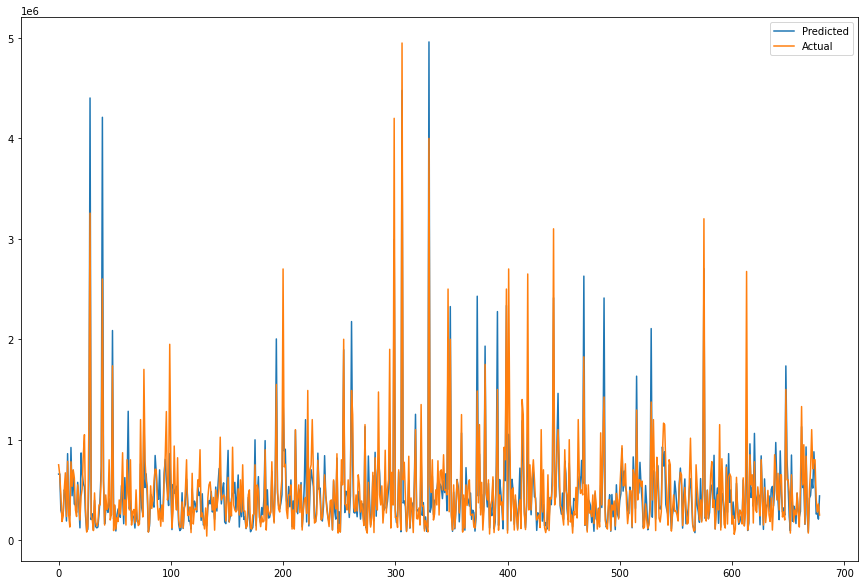

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

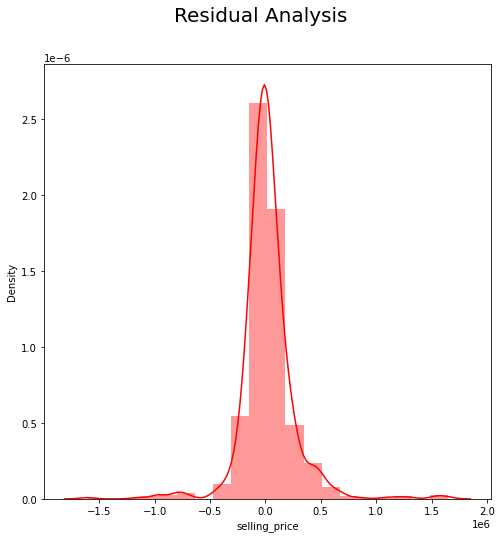

In [ ]:
#Residual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

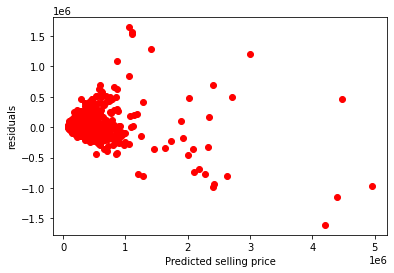

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## ElasticNet Regression

---

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(l1_ratio= 0.5, alpha = .001, max_iter= 1000, fit_intercept=True, normalize = True,)

In [ ]:
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.001, normalize=True)

In [ ]:
elastic.score(X_train, y_train)

0.5475053034207962

In [ ]:
y_pred_e = elastic.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_e))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_e))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_e))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_e)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 152660724130.00342
MAE : 201632.088374917
RMSE : 390718.2157642556
R2 : 0.4045120070739323
Adjusted R2 :  0.3910394280484557


Text(0, 0.5, 'Predicted selling price')

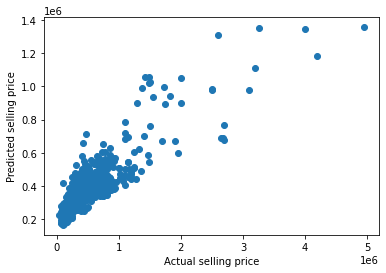

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_e))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

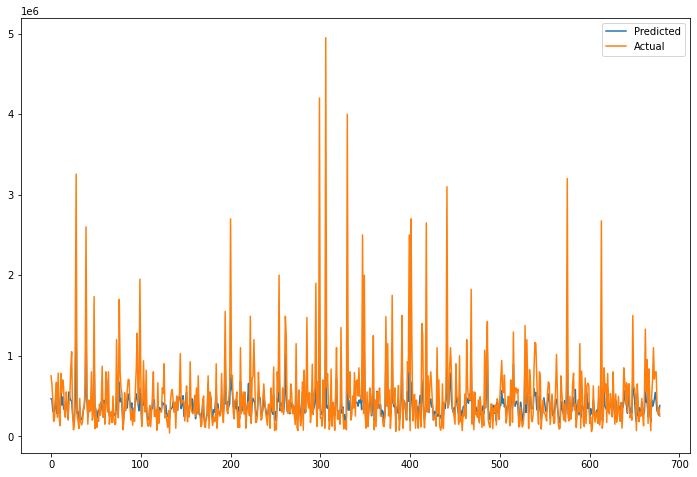

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(10**(y_pred_e))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

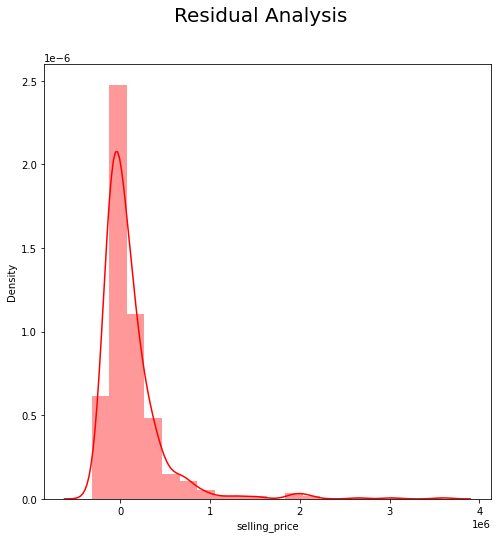

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_e)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

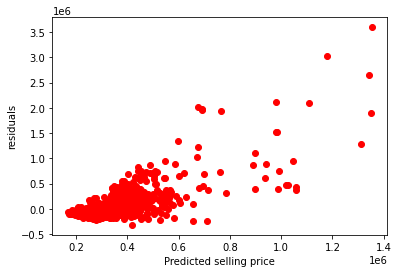

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_e),10**(y_test)-10**(y_pred_e),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## Running Grid Search Cross Validation for ElasticNet Regression

---


In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
# how much importance should be given to l1 reguralization
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True,
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [ ]:
cv_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=2000, n_jobs=-1, normalize=True)

In [ ]:
#The amount of penalization chosen by cross validation
print('Optimal alpha: %.8f'%cv_model.alpha_)

#The compromise between l1 and l2 penalization chosen by cross validation
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)

#number of iterations run by the coordinate descent solver to reach the specified tolerance for the optimal alpha.
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00002163
Optimal l1_ratio: 1.000
Number of iterations 48


In [ ]:
elasticnet = ElasticNet(l1_ratio= 1, alpha = 0.00002163, max_iter= 48, fit_intercept=True, normalize = True,)

In [ ]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=2.163e-05, l1_ratio=1, max_iter=48, normalize=True)

In [ ]:
#Model Prediction
y_pred_elastic = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61335969177.97151
RMSE : 247660.99648101942
R2 : 0.7607450548389811
Adjusted R2 :  0.7553320470299083


Text(0.5, 0.98, 'Residual Analysis')

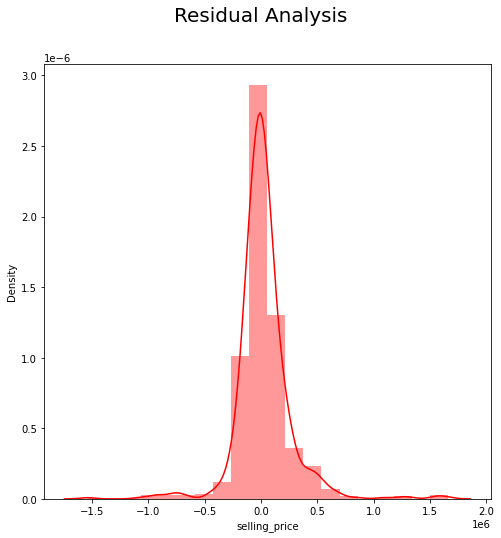

In [ ]:
#Resildual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_elastic)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

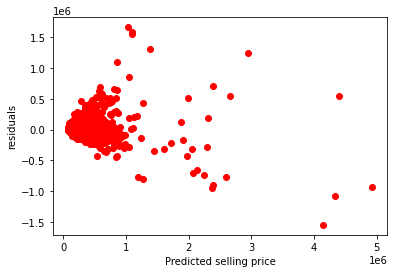

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_elastic),10**(y_test)-10**(y_pred_elastic),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Conclusions**

---
Applied four Regression Models i.e, Linear, Ridge, Lasso,ElasticNet and got the best R2 score of .7607 for ElasticNet.

